--- MANUFACTURING RECOMMENDATIONS ---
✗ Product_A: 53.1% margin, $58,967 profit, Risk: 6.2, Defects: 1.2%
✗ Product_B: 12.1% margin, $17,166 profit, Risk: 4.5, Defects: 3.3%
✗ Product_C: 33.3% margin, $5,706 profit, Risk: 2.6, Defects: 5.5%
✗ Product_D: 33.4% margin, $8,530 profit, Risk: 3.3, Defects: 5.5%
✗ Product_E: 40.4% margin, $8,869 profit, Risk: 6.1, Defects: 4.9%
✓ Product_F: 48.8% margin, $65,905 profit, Risk: 2.2, Defects: 2.6%
✗ Product_G: 23.0% margin, $6,282 profit, Risk: 6.3, Defects: 4.7%
✗ Product_H: -30.3% margin, $-20,394 profit, Risk: 4.0, Defects: 3.4%
✗ Product_I: -50.7% margin, $-11,457 profit, Risk: 7.5, Defects: 7.8%
✗ Product_J: 7.5% margin, $3,973 profit, Risk: 6.2, Defects: 6.9%

--- FINANCIAL IMPACT ---
Total Expected Profit: $65,905.10
Total Expected Revenue: $138,584.31

📊 Results saved to: manufacturing_decisions.csv


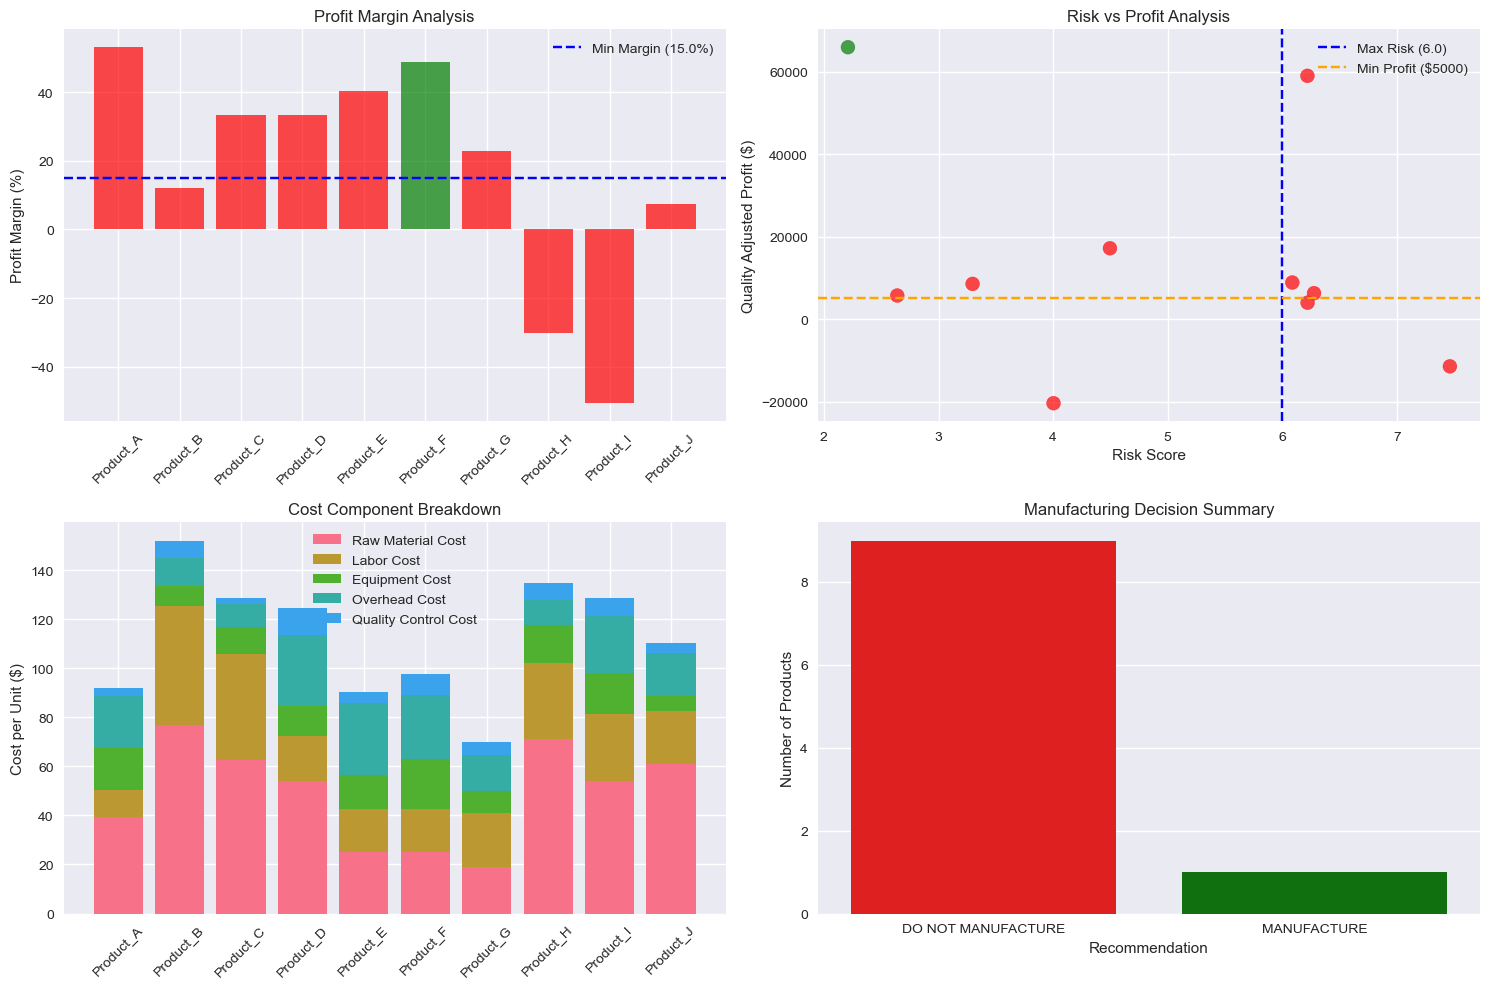

In [1]:
# Manufacturing Cost Simulation & Product Decision Analysis
# This script simulates costs for different products and decides which ones to manufacture
# based on profitability, risk, and quality criteria. It also visualizes the results.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # Ignore unnecessary warnings

# Set up plot style for clean visuals
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# --- Step 1: Generate Synthetic Manufacturing Data ---

# List of products simulated in this analysis
products = ['Product_A', 'Product_B', 'Product_C', 'Product_D', 'Product_E',
            'Product_F', 'Product_G', 'Product_H', 'Product_I', 'Product_J']

n_products = len(products)  # Number of products to simulate

# Random seed ensures reproducible results
np.random.seed(42)

# Create a DataFrame with randomly generated realistic data for each product
manufacturing_data = pd.DataFrame({
    'Product': products,
    # Core manufacturing cost components (randomized realistic values, in USD)
    'Raw_Material_Cost': np.random.uniform(15, 80, n_products),
    'Labor_Cost': np.random.uniform(10, 50, n_products),
    'Equipment_Cost': np.random.uniform(5, 25, n_products),
    'Overhead_Cost': np.random.uniform(8, 30, n_products),
    'Quality_Control_Cost': np.random.uniform(2, 12, n_products),
    # Sales & operational variables (randomized)
    'Selling_Price': np.random.uniform(80, 200, n_products),        # Market price per unit
    'Production_Capacity': np.random.randint(100, 1000, n_products),# Maximum units that can be produced
    'Market_Demand': np.random.randint(80, 1200, n_products),       # Customer demand
    'Lead_Time_Days': np.random.randint(5, 30, n_products),         # Time to produce (days)
    # Risk & quality variables
    'Defect_Rate_Percent': np.random.uniform(0.5, 8.0, n_products), # % of defective units
    'Market_Risk_Score': np.random.uniform(1, 10, n_products),      # External market risk score
    'Supply_Chain_Risk': np.random.uniform(1, 8, n_products)        # Supply disruption risk score
})

# --- Step 2: Cost, Profit, and Risk Calculations ----

# Calculate the total manufacturing cost per unit by summing all cost components
manufacturing_data['Total_Manufacturing_Cost'] = (
    manufacturing_data['Raw_Material_Cost'] +
    manufacturing_data['Labor_Cost'] +
    manufacturing_data['Equipment_Cost'] +
    manufacturing_data['Overhead_Cost'] +
    manufacturing_data['Quality_Control_Cost']
)

# Calculate gross profit per unit: price minus total cost
manufacturing_data['Gross_Profit_Per_Unit'] = (
    manufacturing_data['Selling_Price'] - manufacturing_data['Total_Manufacturing_Cost']
)

# Compute profit margin percentage as profit per unit divided by selling price
manufacturing_data['Profit_Margin_Percent'] = (
    manufacturing_data['Gross_Profit_Per_Unit'] / manufacturing_data['Selling_Price'] * 100
)

# Actual production volume is constrained by minimum of market demand and production capacity
manufacturing_data['Actual_Production_Volume'] = np.minimum(
    manufacturing_data['Production_Capacity'],
    manufacturing_data['Market_Demand']
)

# Calculate total revenue and profit for each product
manufacturing_data['Total_Revenue'] = (
    manufacturing_data['Selling_Price'] * manufacturing_data['Actual_Production_Volume']
)
manufacturing_data['Total_Profit'] = (
    manufacturing_data['Gross_Profit_Per_Unit'] * manufacturing_data['Actual_Production_Volume']
)

# Adjust profit for defects: profit is reduced by defect rate
manufacturing_data['Quality_Adjusted_Profit'] = (
    manufacturing_data['Total_Profit'] * (1 - manufacturing_data['Defect_Rate_Percent'] / 100)
)

# Risk Score: combine market and supply chain risks (average)
manufacturing_data['Risk_Score'] = (
    manufacturing_data['Market_Risk_Score'] + manufacturing_data['Supply_Chain_Risk']
) / 2

# --- Step 3: Decision Logic ---

# Define thresholds for viable manufacturing
MINIMUM_PROFIT_MARGIN = 15.0            # % profit margin required
MINIMUM_TOTAL_PROFIT = 5000             # minimum total profit in USD
MAXIMUM_RISK_SCORE = 6.0                # maximum acceptable risk score
MAXIMUM_DEFECT_RATE = 5.0               # maximum allowed defect rate %

# Compute decision conditions for every product
manufacturing_data['Meets_Profit_Margin'] = (
    manufacturing_data['Profit_Margin_Percent'] >= MINIMUM_PROFIT_MARGIN
)
manufacturing_data['Meets_Total_Profit'] = (
    manufacturing_data['Quality_Adjusted_Profit'] >= MINIMUM_TOTAL_PROFIT
)
manufacturing_data['Acceptable_Risk'] = (
    manufacturing_data['Risk_Score'] <= MAXIMUM_RISK_SCORE
)
manufacturing_data['Acceptable_Quality'] = (
    manufacturing_data['Defect_Rate_Percent'] <= MAXIMUM_DEFECT_RATE
)

# The final decision is True only if all conditions above are satisfied
manufacturing_data['Manufacturing_Decision'] = (
    manufacturing_data['Meets_Profit_Margin'] &
    manufacturing_data['Meets_Total_Profit'] &
    manufacturing_data['Acceptable_Risk'] &
    manufacturing_data['Acceptable_Quality']
)

# Convert the boolean decision to a readable recommendation string
manufacturing_data['Recommendation'] = manufacturing_data['Manufacturing_Decision'].map({
    True: 'MANUFACTURE',
    False: 'DO NOT MANUFACTURE'
})

# --- Step 4: Display Results in Terminal ---

print('--- MANUFACTURING RECOMMENDATIONS ---')
for _, row in manufacturing_data.iterrows():
    status = '✓' if row['Recommendation'] == 'MANUFACTURE' else '✗'
    print(
        f"{status} {row['Product']}: "
        f"{row['Profit_Margin_Percent']:.1f}% margin, "
        f"${row['Quality_Adjusted_Profit']:,.0f} profit, "
        f"Risk: {row['Risk_Score']:.1f}, "
        f"Defects: {row['Defect_Rate_Percent']:.1f}%"
    )

# Financial impact summary
manufacture_products = manufacturing_data[manufacturing_data['Recommendation'] == 'MANUFACTURE']
total_profit = manufacture_products['Quality_Adjusted_Profit'].sum()
total_revenue = manufacture_products['Total_Revenue'].sum()

print('\n--- FINANCIAL IMPACT ---')
print(f"Total Expected Profit: ${total_profit:,.2f}")
print(f"Total Expected Revenue: ${total_revenue:,.2f}")

# Optionally, results CSV export (for deeper analysis or Power BI/Excel use)
manufacturing_data.to_csv('manufacturing_decisions.csv', index=False)
print('\n📊 Results saved to: manufacturing_decisions.csv')

# --- Step 5: Data Visualization ---

# Visualization helps quickly compare profitability, risk, and cost structure
plt.figure(figsize=(15, 10))

# Profit margin by product with decision colors
plt.subplot(2, 2, 1)
colors = ['green' if rec == 'MANUFACTURE' else 'red'
          for rec in manufacturing_data['Recommendation']]
plt.bar(manufacturing_data['Product'], manufacturing_data['Profit_Margin_Percent'],
        color=colors, alpha=0.7)
plt.axhline(y=MINIMUM_PROFIT_MARGIN, color='blue', linestyle='--',
            label=f'Min Margin ({MINIMUM_PROFIT_MARGIN}%)')
plt.title('Profit Margin Analysis')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.legend()

# Scatter plot: Risk vs Profit analysis
plt.subplot(2, 2, 2)
plt.scatter(manufacturing_data['Risk_Score'], manufacturing_data['Quality_Adjusted_Profit'],
           c=colors, alpha=0.7, s=100)
plt.axvline(x=MAXIMUM_RISK_SCORE, color='blue', linestyle='--',
            label=f'Max Risk ({MAXIMUM_RISK_SCORE})')
plt.axhline(y=MINIMUM_TOTAL_PROFIT, color='orange', linestyle='--',
            label=f'Min Profit (${MINIMUM_TOTAL_PROFIT})')
plt.xlabel('Risk Score')
plt.ylabel('Quality Adjusted Profit ($)')
plt.title('Risk vs Profit Analysis')
plt.legend()

# Stacked bar: Cost component breakdown per product
plt.subplot(2, 2, 3)
cost_components = ['Raw_Material_Cost', 'Labor_Cost', 'Equipment_Cost',
                   'Overhead_Cost', 'Quality_Control_Cost']
bottom = np.zeros(len(manufacturing_data))
for component in cost_components:
    plt.bar(manufacturing_data['Product'], manufacturing_data[component],
            bottom=bottom, label=component.replace('_', ' '))
    bottom += manufacturing_data[component]
plt.title('Cost Component Breakdown')
plt.ylabel('Cost per Unit ($)')
plt.xticks(rotation=45)
plt.legend()

# Count plot: How many products are recommended for manufacturing
plt.subplot(2, 2, 4)
sns.countplot(x='Recommendation', data=manufacturing_data,
              palette={'MANUFACTURE': 'green', 'DO NOT MANUFACTURE': 'red'})
plt.title('Manufacturing Decision Summary')
plt.ylabel('Number of Products')

plt.tight_layout()
plt.show()
